**2. Density Operators**

**2.1. Pure states**

Coherent superposition, or pure states:

$$|\psi\rangle = c_1 |\phi_1\rangle + c_2|\phi_2\rangle + ... + c_d|\phi_d\rangle = \sum_{j=1}^{d}{c_j|\phi_j}\rangle$$

Expectation values:

$$\langle A \rangle = \langle\psi|A|\psi\rangle$$

In [23]:
import numpy as np

d = 3
basis = np.eye(d)
print(f'basis = \n{basis}\n')

# some coefficients of the state
cs = np.array([1/np.sqrt(3), 1j/np.sqrt(3), -1/np.sqrt(3)])
print(f'cs = {cs}\n')

# the state psi
psi = sum([c*b for c, b in zip(cs, basis)])
print(f'psi = {psi}\n')

# some operator
A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
print(f'A = \n{A}\n')

# the expectation value of A in the state psi
exp_A = np.real(psi.conj().T @ A @ psi)
print(f'<A> = {exp_A}\n')

basis = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

cs = [ 0.57735027+0.j          0.        +0.57735027j -0.57735027+0.j        ]

psi = [ 0.57735027+0.j          0.        +0.57735027j -0.57735027+0.j        ]

A = 
[[1 0 0]
 [0 2 0]
 [0 0 3]]

<A> = 2.0000000000000004



**2.3. Definition and properties of the density operator**

The density operator:

$$\rho = \sum_{i,j=1}^{d}p_{ij}|\psi_i\rangle\langle\psi_j|$$

The expactation value can be calculated as,

$$\langle A \rangle = \text{Tr}[A\rho]$$

In [28]:
import numpy as np

d = 3
basis = np.eye(d)

# some probabilities
ps = np.array([0.1, 0.3, 0.6])

# the density operator of pure state
rho = sum([p*np.outer(b, b.conj()) for p, b in zip(ps, basis)])
print(f'rho = \n{rho}\n')

# some operator
A = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])

# the expectation value of A in the state rho
exp_A = np.real(np.trace(rho @ A))
print(f'<A> = {exp_A}\n')

rho = 
[[0.1 0.  0. ]
 [0.  0.3 0. ]
 [0.  0.  0.6]]

<A> = 2.5



**2.4. Composite systems**

**2.4.1. Tensor product and partial trace**

Composite systems:

$$ \mathcal{H} = \otimes_i \mathcal{H}_i$$

The tensor product:

$$ \mathcal{B} = \Bigl\{|\phi_i\rangle_1 \otimes |\phi_j\rangle_2\Bigr\}_{i,j}$$

The partial trace of *tracing over* the subsystem 2:

$$\rho_1 = \text{Tr}_2[\rho]$$

In [12]:
# Kronecker product
psi1 = np.array([1, 0])
psi2 = np.array([0, 1])
psi = np.kron(psi1, psi2)
print(f'psi = {psi}\n')

# partial trace
d1 = len(psi1)
d2 = len(psi2)

rho = np.outer(psi, psi.conj())
print(f'rho = \n{rho}\n')

rho1 = np.trace(rho.reshape(d1, d2, d1, d2), axis1=1, axis2=3)
print(f'rho1 = \n{rho1}\n')

rho2 = np.trace(rho.reshape(d1, d2, d1, d2), axis1=0, axis2=2)
print(f'rho2 = \n{rho2}\n')

psi = [0 1 0 0]

rho = 
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]

rho1 = 
[[1 0]
 [0 0]]

rho2 = 
[[0 0]
 [0 1]]



The bipartite pure state:

$$|\psi(\theta)\rangle = \cos(\theta)|00\rangle + \sin(\theta)|11\rangle$$

The state $\rho(\theta) = |\psi(\theta)\rangle \langle\psi(\theta)|$ is spearable for $\theta = 0, \pi/2$, and entangled otherwise, being maximally entangled for $\theta = \pi/4$.

To measure the degree of mixedness of a density operator we can use the *purity* $\mathcal{P}$,

$$\mathcal{P}[\rho] = \text{Tr}[\rho^2] = \sum_{j=1}^{d}p_j^2$$

which is bounded between 1, for pure states $\rho = |\psi\rangle\langle\psi|$ and $1/d$, for maxiamlly mixed states $\rho = \mathbf{1}/d$.

The following script calculates the marginal state of the first subsystem, $\rho_1(\theta) = \text{Tr}_2\rho(\theta)$, showing that its purity $\mathcal{P}[\rho_1(\theta)] < 1$ for $\theta \neq k\pi / 2$.

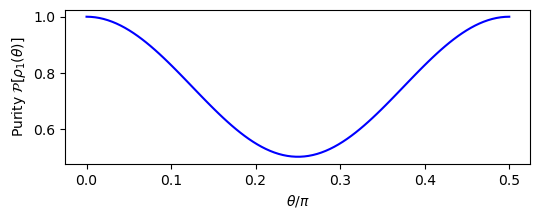

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Purity of state rho
def Purity(rho):
    return np.trace(rho @ rho)

# partial trace of bipartite systems
def PartialTrace(rho, d1, d2, system=1):
    axis1, axis2 = (0, 2) if system == 1 else (1, 3)
    return np.trace(rho.reshape(d1, d2, d1, d2), axis1=axis1, axis2=axis2)

d1, d2 = 2, 2 # dimension
B1, B2 = np.eye(d1), np.eye(d2) # basis
thetas = np.linspace(0, np.pi/2, 100)
purity = []

for theta in thetas:
    psi = (np.cos(theta)*np.kron(B1[0], B2[0]) + \
           np.sin(theta)*np.kron(B1[1], B2[1]))
    rho = np.outer(psi, psi.conj()) # density operator
    rho1 = PartialTrace(rho, d1, d2, system=1)
    purity.append(Purity(rho1))

fig, ax = plt.subplots(figsize=(6, 2))

ax.plot(thetas/np.pi, purity, 'b')
ax.set_xlabel(r'$\theta/\pi$')
ax.set_ylabel(r'Purity $\mathcal{P}[\rho_1(\theta)]$')

plt.show()

**2.4.2 Direct sum**

The direct sum:

$$\mathcal{H} = \mathcal{H}_a \oplus \mathcal{H}_b$$

A basis of this space is constructed by using a block matrix:

$$M = \begin{pmatrix} M_a & \mathbf{0} \\ \mathbf{0}^\text{T} & M_b \end{pmatrix} $$

In [18]:
import numpy as np

d_a, d_b = 2, 3 # dimensions
basis_a, basis_b = np.eye(d_a), np.eye(d_b) # bases
zeros = np.zeros((d_a, d_b))
basis = np.block([[basis_a, zeros],
                  [zeros.T, basis_b]]) # joint basis
print(f'basis = \n{basis}\n')

basis = 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]



**2.5. Schrodinger and von Neumann equations**

The *von Neumann* equation:

$$\dot{\rho}(t) = -\frac{i}{\hbar}[H, \rho(t)]$$

In general, the solution to this equation is given by some unitary operator $U(t;t_0)$ that propagates the state from $t_0$ to $t$.

$$\rho(t) = U(t;t_0)\rho(t_0)U(t;t_0)^\dagger$$

If $H$ is time-independent the solution is given by $U(t;t_0) = exp[-iH(t-t_0)/\hbar]$ and can be reduced to $U(\tau) = exp[-iH\tau/\hbar]$.

**2.5.1 Open quantum systems**

The dynamics of the full composite systems $\text{S-E}$ follows the above equation with Hamiltonian:

$$ H = H_\text{S} + H_\text{E} + H_\text{int}$$

If the solution $U(t;t_0)$ is known, the dynamics of the system $\text{S}$ can be drawn from the state of the universe $\rho$ by tracing over the envronment's degrees of freedom,

$$\rho_\text{S}(t) = \text{Tr}_\text{E}[\rho(t)]$$

However, finding $U$ for large composite systems is often a difficult problem. Instead, we obtain the dynamics by the following equation:

$$\dot{\rho}_\text{S}(t) = -\frac{i}{\hbar}\text{Tr}_\text{E}{[H,\rho(t)]}$$